In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv("D:/Projects/Datasets-20241122T035130Z-001/Datasets/20000_Indians.csv")  # Uncomment and add your dataset path



In [3]:

# Assuming df is your DataFrame

# List of expense-related columns
expense_columns = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 
                   'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 
                   'Education', 'Miscellaneous']

# Create a new 'Total_Expenses' column by summing the expense columns
df['Total_Expenses'] = df[expense_columns].sum(axis=1)

# Check the updated DataFrame
print(df[['Rent', 'Loan_Repayment', 'Insurance', 'Total_Expenses']].head())


           Rent  Loan_Repayment    Insurance  Total_Expenses
0  13391.174891        0.000000  2206.490129    33371.621929
1   5371.719318        0.000000   869.522617    17181.777859
2   7555.140763     4612.103386  2201.800050    36476.154459
3  15218.340037     6809.441427  4889.418087    69837.646632
4   4975.056710     3112.609398   635.907170    18609.583016


In [4]:
# Drop individual expense columns
df = df.drop(columns=expense_columns)

# Check the updated DataFrame
print(df.head())


          Income  Age  Dependents     Occupation City_Tier  \
0   44637.249636   49           0  Self_Employed    Tier_1   
1   26858.596592   34           2        Retired    Tier_2   
2   50367.605084   35           1        Student    Tier_3   
3  101455.600247   21           0  Self_Employed    Tier_3   
4   24875.283548   52           4   Professional    Tier_2   

   Desired_Savings_Percentage  Desired_Savings  Disposable_Income  \
0                   13.890948      6200.537192       11265.627707   
1                    7.160376      1923.176434        9676.818733   
2                   13.997808      7050.360422       13891.450624   
3                   16.455440     16694.965136       31617.953615   
4                    7.533982      1874.099434        6265.700532   

   Potential_Savings_Groceries  Potential_Savings_Transport  \
0                  1685.696222                   328.895281   
1                   540.306561                   119.347139   
2                  1466

In [5]:
import pandas as pd

# Assuming df is your DataFrame

# List of columns to drop (those containing 'Potential_Savings' in their name)
columns_to_drop = [col for col in df.columns if 'Potential_Savings' in col]

# Drop these columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

# Check the updated DataFrame
print(df_cleaned.head())


          Income  Age  Dependents     Occupation City_Tier  \
0   44637.249636   49           0  Self_Employed    Tier_1   
1   26858.596592   34           2        Retired    Tier_2   
2   50367.605084   35           1        Student    Tier_3   
3  101455.600247   21           0  Self_Employed    Tier_3   
4   24875.283548   52           4   Professional    Tier_2   

   Desired_Savings_Percentage  Desired_Savings  Disposable_Income  \
0                   13.890948      6200.537192       11265.627707   
1                    7.160376      1923.176434        9676.818733   
2                   13.997808      7050.360422       13891.450624   
3                   16.455440     16694.965136       31617.953615   
4                    7.533982      1874.099434        6265.700532   

   Total_Expenses  
0    33371.621929  
1    17181.777859  
2    36476.154459  
3    69837.646632  
4    18609.583016  


In [6]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming df_cleaned is your DataFrame and it contains the correct values

# Fit the LabelEncoder for 'Occupation' and 'City_Tier'
label_encoder_occupation = LabelEncoder()
label_encoder_occupation.fit(df_cleaned['Occupation'])
joblib.dump(label_encoder_occupation, 'label_encoder_occupation.pkl')  # Save the encoder

label_encoder_city_tier  = LabelEncoder()
label_encoder_city_tier .fit(df_cleaned['City_Tier'])
joblib.dump(label_encoder_city_tier , 'label_encoder_city_tier.pkl')  

['label_encoder_city_tier.pkl']

In [7]:
df_cleaned

,Income,Age,Dependents,Occupation,City_Tier,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Total_Expenses
0,44637.249636,49,0,Self_Employed,Tier_1,13.890948,6200.537192,11265.627707,33371.621929
1,26858.596592,34,2,Retired,Tier_2,7.160376,1923.176434,9676.818733,17181.777859
2,50367.605084,35,1,Student,Tier_3,13.997808,7050.360422,13891.450624,36476.154459
3,101455.600247,21,0,Self_Employed,Tier_3,16.455440,16694.965136,31617.953615,69837.646632
4,24875.283548,52,4,Professional,Tier_2,7.533982,1874.099434,6265.700532,18609.583016
...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12.353542,1163.318310,1163.318310,39750.147868
19996,90295.772638,21,1,Student,Tier_2,11.754249,10613.589598,30725.175170,59570.597468
19997,40604.567373,30,1,Professional,Tier_2,13.854837,2267.905134,2267.905134,38336.662239
19998,118157.817240,27,2,Professional,Tier_1,17.436659,10603.684814,10603.684814,107554.132426


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is the DataFrame you're using

# Handle missing values if any
df_cleaned = df_cleaned.dropna()  # or use df_cleaned.fillna() if you want to fill missing values

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df_cleaned['Occupation'] = le.fit_transform(df_cleaned['Occupation'])
df_cleaned['City_Tier'] = le.fit_transform(df_cleaned['City_Tier'])

# Normalize/Scale numerical data (optional)
scaler = StandardScaler()
df_cleaned[['Income', 'Age', 'Disposable_Income', 'Total_Expenses']] = scaler.fit_transform(df_cleaned[['Income', 'Age', 'Disposable_Income', 'Total_Expenses']])

# Check the cleaned and scaled DataFrame
print(df_cleaned.head())


     Income       Age  Dependents  Occupation  City_Tier  \
0  0.076268  0.586855           0           2          0   
1 -0.368048 -0.517841           2           1          1   
2  0.219478 -0.444195           1           3          2   
3  1.496246 -1.475245           0           2          2   
4 -0.417614  0.807795           4           0          1   

   Desired_Savings_Percentage  Desired_Savings  Disposable_Income  \
0                   13.890948      6200.537192           0.052661   
1                    7.160376      1923.176434          -0.082668   
2                   13.997808      7050.360422           0.276319   
3                   16.455440     16694.965136           1.786199   
4                    7.533982      1874.099434          -0.373215   

   Total_Expenses  
0        0.080639  
1       -0.455845  
2        0.183514  
3        1.289016  
4       -0.408532  


In [9]:
# Define features (X) and targets (y)
X = df_cleaned[['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Disposable_Income', 'Total_Expenses']]
y_savings = df_cleaned['Desired_Savings']  # Target variable for Desired Savings
y_percentage = df_cleaned['Desired_Savings_Percentage']  # Target variable for Desired Savings Percentage

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_savings, y_test_savings = train_test_split(X, y_savings, test_size=0.2, random_state=42)
X_train, X_test, y_train_percentage, y_test_percentage = train_test_split(X, y_percentage, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the model
model_savings = RandomForestRegressor(n_estimators=100, random_state=42)
model_percentage = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model for Desired Savings
model_savings.fit(X_train, y_train_savings)

# Train the model for Desired Savings Percentage
model_percentage.fit(X_train, y_train_percentage)

# Predict on the test set for Desired Savings
y_pred_savings = model_savings.predict(X_test)

# Predict on the test set for Desired Savings Percentage
y_pred_percentage = model_percentage.predict(X_test)

# Evaluate the models
mae_savings = mean_absolute_error(y_test_savings, y_pred_savings)
r2_savings = r2_score(y_test_savings, y_pred_savings)

mae_percentage = mean_absolute_error(y_test_percentage, y_pred_percentage)
r2_percentage = r2_score(y_test_percentage, y_pred_percentage)

print(f"Desired Savings Model MAE: {mae_savings}, R²: {r2_savings}")
print(f"Desired Savings Percentage Model MAE: {mae_percentage}, R²: {r2_percentage}")


Desired Savings Model MAE: 606.7049430348463, R²: 0.9210714961252832
Desired Savings Percentage Model MAE: 1.3603591206993597, R²: 0.8236349558410098


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

# # Initialize the model
# model_savings = GradientBoostingRegressor(n_estimators=100, random_state=42)
# model_percentage = GradientBoostingRegressor(n_estimators=100, random_state=42)

# # Train the model for Desired Savings
# model_savings.fit(X_train, y_train_savings)

# # Train the model for Desired Savings Percentage
# model_percentage.fit(X_train, y_train_percentage)

# # Predict on the test set for Desired Savings
# y_pred_savings = model_savings.predict(X_test)

# # Predict on the test set for Desired Savings Percentage
# y_pred_percentage = model_percentage.predict(X_test)

# # Evaluate the models
# mae_savings = mean_absolute_error(y_test_savings, y_pred_savings)
# r2_savings = r2_score(y_test_savings, y_pred_savings)

# mae_percentage = mean_absolute_error(y_test_percentage, y_pred_percentage)
# r2_percentage = r2_score(y_test_percentage, y_pred_percentage)

# print(f"Gradient Boosting - Desired Savings Model MAE: {mae_savings}, R²: {r2_savings}")
# print(f"Gradient Boosting - Desired Savings Percentage Model MAE: {mae_percentage}, R²: {r2_percentage}")


Gradient Boosting - Desired Savings Model MAE: 612.1992307335902, R²: 0.9285254168519934
Gradient Boosting - Desired Savings Percentage Model MAE: 1.3294739688305544, R²: 0.8347143020129382


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.6, 0.8, 1.0]
# }

# # Initialize the model
# gb = GradientBoostingRegressor(random_state=42)

# # GridSearchCV
# gb_grid = GridSearchCV(
#     estimator=gb, param_grid=param_grid, 
#     cv=5, verbose=2, n_jobs=-1
# )
# gb_grid.fit(X_train, y_train_savings)

# # Best parameters and performance
# print("Best Parameters for Gradient Boosting:", gb_grid.best_params_)
# best_gb = gb_grid.best_estimator_


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


KeyboardInterrupt: 

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

# # Initialize the model
# model_savings = XGBRegressor(n_estimators=100, random_state=42)
# model_percentage = XGBRegressor(n_estimators=100, random_state=42)

# # Train the model for Desired Savings
# model_savings.fit(X_train, y_train_savings)

# # Train the model for Desired Savings Percentage
# model_percentage.fit(X_train, y_train_percentage)

# # Predict on the test set for Desired Savings
# y_pred_savings = model_savings.predict(X_test)

# # Predict on the test set for Desired Savings Percentage
# y_pred_percentage = model_percentage.predict(X_test)

# # Evaluate the models
# mae_savings = mean_absolute_error(y_test_savings, y_pred_savings)
# r2_savings = r2_score(y_test_savings, y_pred_savings)

# mae_percentage = mean_absolute_error(y_test_percentage, y_pred_percentage)
# r2_percentage = r2_score(y_test_percentage, y_pred_percentage)

# print(f"XGBoost - Desired Savings Model MAE: {mae_savings}, R²: {r2_savings}")
# print(f"XGBoost - Desired Savings Percentage Model MAE: {mae_percentage}, R²: {r2_percentage}")


XGBoost - Desired Savings Model MAE: 675.0391489755367, R²: 0.8437176505183743
XGBoost - Desired Savings Percentage Model MAE: 1.3788293258827689, R²: 0.8141491272819266


In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

# # Initialize the model
# model_savings = KNeighborsRegressor(n_neighbors=5)
# model_percentage = KNeighborsRegressor(n_neighbors=5)

# # Train the model for Desired Savings
# model_savings.fit(X_train, y_train_savings)

# # Train the model for Desired Savings Percentage
# model_percentage.fit(X_train, y_train_percentage)

# # Predict on the test set for Desired Savings
# y_pred_savings = model_savings.predict(X_test)

# # Predict on the test set for Desired Savings Percentage
# y_pred_percentage = model_percentage.predict(X_test)

# # Evaluate the models
# mae_savings = mean_absolute_error(y_test_savings, y_pred_savings)
# r2_savings = r2_score(y_test_savings, y_pred_savings)

# mae_percentage = mean_absolute_error(y_test_percentage, y_pred_percentage)
# r2_percentage = r2_score(y_test_percentage, y_pred_percentage)

# print(f"KNN Regressor - Desired Savings Model MAE: {mae_savings}, R²: {r2_savings}")
# print(f"KNN Regressor - Desired Savings Percentage Model MAE: {mae_percentage}, R²: {r2_percentage}")


KNN Regressor - Desired Savings Model MAE: 858.0030509046323, R²: 0.888380027354147
KNN Regressor - Desired Savings Percentage Model MAE: 1.5616166967857268, R²: 0.737489627743241


In [ ]:
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, r2_score

# # Initialize the model
# model_savings = SVR(kernel='rbf')
# model_percentage = SVR(kernel='rbf')

# # Train the model for Desired Savings
# model_savings.fit(X_train, y_train_savings)

# # Train the model for Desired Savings Percentage
# model_percentage.fit(X_train, y_train_percentage)

# # Predict on the test set for Desired Savings
# y_pred_savings = model_savings.predict(X_test)

# # Predict on the test set for Desired Savings Percentage
# y_pred_percentage = model_percentage.predict(X_test)

# # Evaluate the models
# mae_savings = mean_absolute_error(y_test_savings, y_pred_savings)
# r2_savings = r2_score(y_test_savings, y_pred_savings)

# mae_percentage = mean_absolute_error(y_test_percentage, y_pred_percentage)
# r2_percentage = r2_score(y_test_percentage, y_pred_percentage)

# print(f"SVR - Desired Savings Model MAE: {mae_savings}, R²: {r2_savings}")
# print(f"SVR - Desired Savings Percentage Model MAE: {mae_percentage}, R²: {r2_percentage}")


SVR - Desired Savings Model MAE: 3218.405618477252, R²: 0.001532665251394505
SVR - Desired Savings Percentage Model MAE: 1.6172527895293098, R²: 0.7244045480267685


In [11]:
import joblib

# Save the models
joblib.dump(model_savings, 'desired_savings_model.pkl')
joblib.dump(model_percentage, 'desired_savings_percentage_model.pkl')


['desired_savings_percentage_model.pkl']

In [12]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [39]:
# Save the encoder




In [12]:
df_cleaned

,Income,Age,Dependents,Occupation,City_Tier,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Total_Expenses
0,0.076268,0.586855,0,2,0,13.890948,6200.537192,0.052661,0.080639
1,-0.368048,-0.517841,2,1,1,7.160376,1923.176434,-0.082668,-0.455845
2,0.219478,-0.444195,1,3,2,13.997808,7050.360422,0.276319,0.183514
3,1.496246,-1.475245,0,2,2,16.455440,16694.965136,1.786199,1.289016
4,-0.417614,0.807795,4,0,1,7.533982,1874.099434,-0.373215,-0.408532
...,...,...,...,...,...,...,...,...,...
19995,-0.016795,0.734148,4,2,0,12.353542,1163.318310,-0.807817,0.292004
19996,1.217345,-1.475245,1,3,1,11.754249,10613.589598,1.710155,0.948796
19997,-0.024515,-0.812427,1,0,1,13.854837,2267.905134,-0.713732,0.245166
19998,1.913660,-1.033367,2,0,0,17.436659,10603.684814,-0.003721,2.538830


In [13]:
print("Occupation categories during training:", label_encoder_occupation.classes_)
print("City Tier during training :",label_encoder_city_tier.classes_)



Occupation categories during training: ['Professional' 'Retired' 'Self_Employed' 'Student']
City Tier during training : ['Tier_1' 'Tier_2' 'Tier_3']


In [14]:
print(scaler.mean_)
print(scaler.var_)


[4.15854961e+04 4.10314500e+01 1.06473673e+04 3.09381288e+04]
[1.60108340e+09 1.84372561e+02 1.37835672e+08 9.10692635e+08]


In [41]:
print(df_cleaned[['Income', 'Age', 'Disposable_Income', 'Total_Expenses']].head())


     Income       Age  Disposable_Income  Total_Expenses
0  0.076268  0.586855           0.052661        0.080639
1 -0.368048 -0.517841          -0.082668       -0.455845
2  0.219478 -0.444195           0.276319        0.183514
3  1.496246 -1.475245           1.786199        1.289016
4 -0.417614  0.807795          -0.373215       -0.408532


In [42]:
df_cleaned

,Income,Age,Dependents,Occupation,City_Tier,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Total_Expenses
0,0.076268,0.586855,0,2,0,13.890948,6200.537192,0.052661,0.080639
1,-0.368048,-0.517841,2,1,1,7.160376,1923.176434,-0.082668,-0.455845
2,0.219478,-0.444195,1,3,2,13.997808,7050.360422,0.276319,0.183514
3,1.496246,-1.475245,0,2,2,16.455440,16694.965136,1.786199,1.289016
4,-0.417614,0.807795,4,0,1,7.533982,1874.099434,-0.373215,-0.408532
...,...,...,...,...,...,...,...,...,...
19995,-0.016795,0.734148,4,2,0,12.353542,1163.318310,-0.807817,0.292004
19996,1.217345,-1.475245,1,3,1,11.754249,10613.589598,1.710155,0.948796
19997,-0.024515,-0.812427,1,0,1,13.854837,2267.905134,-0.713732,0.245166
19998,1.913660,-1.033367,2,0,0,17.436659,10603.684814,-0.003721,2.538830


In [ ]:
# from sklearn.cluster import KMeans

# # Select features for clustering
# features_for_clustering = df_cleaned[['Income', 'Age','Dependents','Occupation', 'City_Tier', 'Disposable_Income', 'Total_Expenses']]

# # Initialize KMeans with 3 clusters (you can adjust the number of clusters as needed)
# kmeans = KMeans(n_clusters=3, random_state=42)

# # Fit the KMeans model and predict the clusters
# df_cleaned['Cluster'] = kmeans.fit_predict(features_for_clustering)

# # Output cluster centers and distribution
# print("Cluster Centers:\n", kmeans.cluster_centers_)
# print("Cluster Distribution:\n", df_cleaned['Cluster'].value_counts())


Cluster Centers:
 [[-0.23686515 -0.0104871   3.33039432  1.67303453  0.89199118 -0.26299264
  -0.21175214]
 [ 2.32556122 -0.03134529  2.06263499  1.52105832  0.9924406   2.13761841
   2.2519144 ]
 [-0.23769771  0.01439482  0.89190543  1.35073132  0.89581246 -0.18145376
  -0.24457799]]
Cluster Distribution:
 Cluster
2    9985
0    8167
1    1848
Name: count, dtype: int64


In [ ]:
# import pandas as pd
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# import joblib

# features_for_clustering = df_cleaned[['Income', 'Age','Dependents','Occupation', 'City_Tier', 'Disposable_Income', 'Total_Expenses']]

# # Standardize the features (DBSCAN is sensitive to the scale of data)
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features_for_clustering)

# # Perform DBSCAN clustering
# dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # You can adjust 'eps' and 'min_samples' based on your data
# dbscan_model.fit(scaled_features)

# # Add the cluster labels to the original dataframe
# df_cleaned['Cluster_Label'] = dbscan_model.labels_

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

# Select the features for clustering
features_for_clustering = df_cleaned[['Income', 'Age','Dependents','Occupation', 'City_Tier', 'Disposable_Income', 'Total_Expenses']]

# Standardize the features (both KMeans and DBSCAN are sensitive to the scale of data)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=2)  # Adjust these parameters as necessary
dbscan_model.fit(scaled_features)

# Add the DBSCAN cluster labels to the original dataframe
df_cleaned['DBSCAN_Cluster_Label'] = dbscan_model.labels_

# Perform KMeans clustering (for comparison)
kmeans_model = KMeans(n_clusters=3)  # Adjust the number of clusters for KMeans
kmeans_model.fit(scaled_features)

# Add the KMeans cluster labels to the original dataframe
df_cleaned['KMeans_Cluster_Label'] = kmeans_model.labels_

# Print DBSCAN Cluster Information
print("DBSCAN - Number of Clusters (excluding noise):", len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0))
print("DBSCAN - Number of Noise Points:", list(dbscan_model.labels_).count(-1))

# Print the cluster distribution (number of points per cluster)
print("\nDBSCAN - Cluster Distribution:")
print(df_cleaned['DBSCAN_Cluster_Label'].value_counts())

# For comparison, print KMeans cluster centers and distribution
print("\nKMeans - Cluster Centers:")
print(kmeans_model.cluster_centers_)

print("\nKMeans - Cluster Distribution:")
print(df_cleaned['KMeans_Cluster_Label'].value_counts())


DBSCAN - Number of Clusters (excluding noise): 426
DBSCAN - Number of Noise Points: 1393

DBSCAN - Cluster Distribution:
DBSCAN_Cluster_Label
-1      1393
 12      499
 43      490
 33      487
 32      477
        ... 
 276       2
 277       2
 278       2
 279       2
 425       2
Name: count, Length: 427, dtype: int64

KMeans - Cluster Centers:
[[-0.25727833  0.01288058 -0.8504903   0.17859268 -0.00873232 -0.19711458
  -0.26444785]
 [-0.2536717  -0.00626094  0.84835812 -0.18301728 -0.02266081 -0.27600164
  -0.22897544]
 [ 2.18231185 -0.02852814  0.03180105  0.01406674  0.13389375  2.01962196
   2.10788098]]

KMeans - Cluster Distribution:
KMeans_Cluster_Label
0    8978
1    8922
2    2100
Name: count, dtype: int64


In [14]:
import joblib

joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Select the features for clustering
# features_for_clustering = df_cleaned[['Income', 'Age', 'Dependents', 'Occupation', 
#                                       'City_Tier', 'Disposable_Income', 'Total_Expenses']]

# # Standardize the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features_for_clustering)

# # Perform DBSCAN clustering with adjusted parameters for three clusters
# eps = 1.4  # Start with a larger value and tune to achieve desired cluster spread
# min_samples = 15  # Ensure reasonable density for clusters
# dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
# dbscan_model.fit(scaled_features)

# # Add the DBSCAN cluster labels to the original dataframe
# df_cleaned['DBSCAN_Cluster_Label'] = dbscan_model.labels_

# # Print DBSCAN Cluster Information
# num_clusters = len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0)
# noise_points = list(dbscan_model.labels_).count(-1)

# print("DBSCAN - Number of Clusters (excluding noise):", num_clusters)
# print("DBSCAN - Number of Noise Points:", noise_points)

# # Print the cluster distribution
# print("\nDBSCAN - Cluster Distribution:")
# print(df_cleaned['DBSCAN_Cluster_Label'].value_counts())


DBSCAN - Number of Clusters (excluding noise): 3
DBSCAN - Number of Noise Points: 354

DBSCAN - Cluster Distribution:
DBSCAN_Cluster_Label
 1    9938
 0    5818
 2    3890
-1     354
Name: count, dtype: int64


In [23]:
import requests

API_KEY = "237063670ba54165ac9952355a2ddbc0"
NEWS_API_URL = "https://newsapi.org/v2/top-headlines?country=in&category=business&apiKey=237063670ba54165ac9952355a2ddbc0" + API_KEY

def fetch_news():
    response = requests.get(NEWS_API_URL)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return articles
    else:
        print("Failed to fetch news:", response.status_code)
        return []


In [24]:
def preprocess_articles(articles):
    news_texts = [article['title'] + ". " + article.get('description', '') for article in articles]
    return news_texts


In [28]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # To check if GPU is available


2.5.1+cpu
False


In [32]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Load model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Encode input text
text = "I love programming!"
inputs = tokenizer(text, return_tensors="pt")

# Make prediction
with torch.no_grad():
    logits = model(**inputs).logits

print(logits)


d:\Projects\Final_Project\final_project\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Prasad\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ImportError: 
DistilBertForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


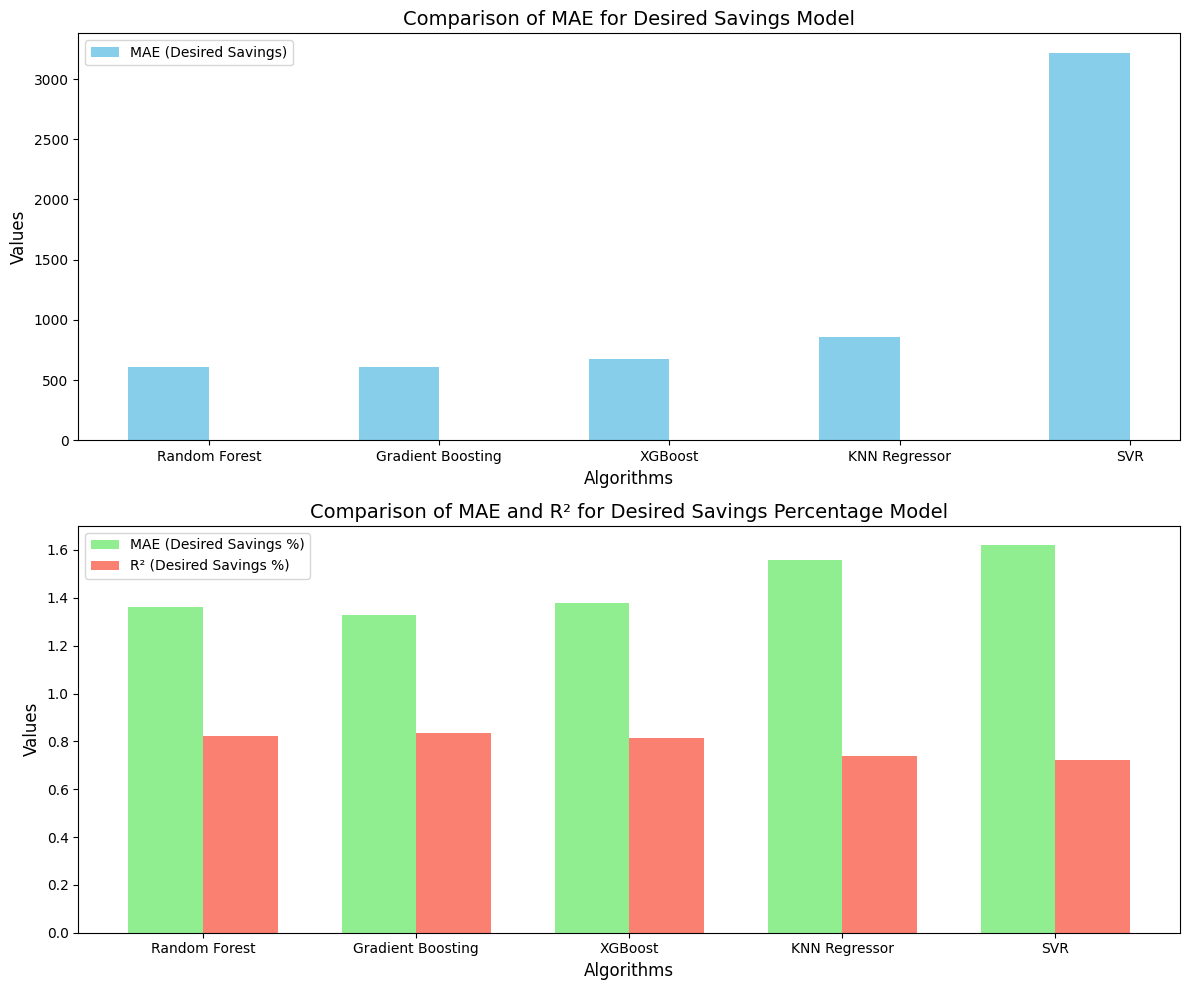

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
algorithms = [
    "Random Forest", 
    "Gradient Boosting", 
    "XGBoost", 
    "KNN Regressor", 
    "SVR"
]

mae_desired_savings = [
    606.70, 
    612.20, 
    675.04, 
    858.00, 
    3218.41
]

r2_desired_savings = [
    0.921, 
    0.929, 
    0.844, 
    0.888, 
    0.002
]

mae_desired_percentage = [
    1.36, 
    1.33, 
    1.38, 
    1.56, 
    1.62
]

r2_desired_percentage = [
    0.824, 
    0.835, 
    0.814, 
    0.737, 
    0.724
]

# Bar Graph for Desired Savings
x = np.arange(len(algorithms))
width = 0.35

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Bar chart 1: Desired Savings
ax[0].bar(x - width/2, mae_desired_savings, width, label='MAE (Desired Savings)', color='skyblue')
#ax[0].bar(x + width/2, r2_desired_savings, width, label='R² (Desired Savings)', color='orange')

# Customize first bar chart
ax[0].set_title('Comparison of MAE for Desired Savings Model', fontsize=14)
ax[0].set_xlabel('Algorithms', fontsize=12)
ax[0].set_ylabel('Values', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(algorithms, fontsize=10)
ax[0].legend()

# Bar chart 2: Desired Savings Percentage
ax[1].bar(x - width/2, mae_desired_percentage, width, label='MAE (Desired Savings %)', color='lightgreen')
ax[1].bar(x + width/2, r2_desired_percentage, width, label='R² (Desired Savings %)', color='salmon')

# Customize second bar chart
ax[1].set_title('Comparison of MAE and R² for Desired Savings Percentage Model', fontsize=14)
ax[1].set_xlabel('Algorithms', fontsize=12)
ax[1].set_ylabel('Values', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(algorithms, fontsize=10)
ax[1].legend()

plt.tight_layout()
plt.show()
